In [1]:
# import sqlite3
import pandas as pd
from datetime import datetime
from pandasql import sqldf
import json
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',1000)

In [3]:
f=open('/Users/j.markdaniels/Downloads/food-enforcement-0001-of-0001.json', 'r')
data=json.load(f)

In [4]:
data.keys()

dict_keys(['meta', 'results'])

In [5]:
data['results'][0]

{'classification': 'Class II',
 'center_classification_date': '20120926',
 'report_date': '20121003',
 'postal_code': '90021-1616',
 'termination_date': '20120926',
 'recall_initiation_date': '20120921',
 'recall_number': 'F-2396-2012',
 'city': 'Los Angeles',
 'more_code_info': None,
 'event_id': '63150',
 'distribution_pattern': 'California',
 'openfda': {},
 'recalling_firm': 'M & K Trading Inc',
 'voluntary_mandated': 'Voluntary: Firm Initiated',
 'state': 'CA',
 'reason_for_recall': 'M & K Trading is recalling Korean Molluscan Shellfish because the product has been prepared, packed, or held under insanitary conditions whereby it may have become contaminated with filth, or whereby it may have been rendered injurious to health.',
 'initial_firm_notification': 'E-Mail',
 'status': 'Terminated',
 'product_type': 'Food',
 'country': 'United States',
 'product_description': 'Seasoned Clams, 240 grams',
 'code_info': 'not available.',
 'address_1': '748 S Alameda St',
 'address_2': '',
 

In [6]:
fda_dict=data['results']

In [7]:
df = pd.DataFrame(fda_dict)


In [8]:
df.isna().sum()

address_1                         0
address_2                         0
center_classification_date       39
city                              0
classification                    0
code_info                         0
country                           0
distribution_pattern              0
event_id                          0
initial_firm_notification         0
more_code_info                17839
openfda                           0
postal_code                       0
product_description               0
product_quantity                  0
product_type                      0
reason_for_recall                 0
recall_initiation_date            0
recall_number                     0
recalling_firm                    0
report_date                       0
state                             0
status                            0
termination_date               1929
voluntary_mandated                0
dtype: int64

In [9]:
df.drop(['more_code_info'],axis=1,inplace=True)

In [10]:
df.to_csv('FDArecall.csv', index=False)

In [11]:
blue_states = ['WA', 'OR', 'CA', 'NV', 'CO', 'NM', 'MN', 'IL', 'VA', 'MD', 'NJ', 'CT', 'MA', 'NY', 'DE', 'VT', 'NH', 'ME', 'HI', 'RI']
df['red_states']=[0 if state in blue_states else 1 for state in df.state]


In [12]:
df['Class_1'] = [1 if c == 'Class I' else 0 for c in df.classification]
df['FDA_initiated'] = [0 if i == 'Voluntary: Firm Initiated' else 1 for i in df.voluntary_mandated]

In [13]:
df['initiation_date']=[datetime.strptime(i,'%Y%m%d').date() for i in df.recall_initiation_date]

In [14]:
df['initiation_year']=[int(i[:4]) for i in df.recall_initiation_date]

In [15]:
df.head(10)

,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,openfda,postal_code,product_description,product_quantity,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated,red_states,Class_1,FDA_initiated,initiation_date,initiation_year
0,748 S Alameda St,,20120926,Los Angeles,Class II,not available.,United States,California,63150,E-Mail,{},90021-1616,"Seasoned Clams, 240 grams",39 units,Food,M & K Trading is recalling Korean Molluscan Sh...,20120921,F-2396-2012,M & K Trading Inc,20121003,CA,Terminated,20120926,Voluntary: Firm Initiated,0,0,0,2012-09-21,2012
1,4401 Foxdale St,,20120924,Irwindale,Class I,"UPC 7774523746, Use by dates 9/8/2012 or earli...",United States,Nationwide to following US States and Canada: ...,63062,Press Release,{},91706-2161,"Ready Pac¿ Sliced Mango, 10.5oz , UPC 77745237...",1544 cases,Food,"Firm is voluntarily recalling, out of an abund...",20120831,F-2382-2012,Ready Pac Foods Inc,20121003,CA,Terminated,20121025,Voluntary: Firm Initiated,0,1,0,2012-08-31,2012
2,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-30871-33001-2, Item # 0291710.",United States,Nationwide and Canada.,62991,Letter,{},92833-2510,"Wildwood Organic Mild Salsa , 14 oz, Pack size...",602 units,Food,The firm recalled due to a potential non-safet...,20120712,F-2438-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated,0,0,0,2012-07-12,2012
3,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-52334-11659-9, Item # 0291661.",United States,Nationwide and Canada.,62991,Letter,{},92833-2510,Wildwood Emerald Valley Kitchen Organic Medium...,575 units,Food,The firm recalled due to a potential non-safet...,20120712,F-2436-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated,0,0,0,2012-07-12,2012
4,1720 Locust Grove Road,,20120921,Manheim,Class II,"No codes; all product ""Purchase by date shown ...",United States,Product was distributed to specific wholesale ...,62465,Telephone,{},17545-9639,"Bulk Foods, Inc. Yellow Corn Meal, Regular Roa...",,Food,FDA samples of product tested positive for Fum...,20120417,F-2374-2012,Haldeman Mills,20121003,PA,Terminated,20130716,Voluntary: Firm Initiated,1,0,0,2012-04-17,2012
5,3919 Oceanic Dr Ste 703,,20120921,Oceanside,Class I,Batch/Lot#0030812,United States,nationwide in the US and worldwide to Canada a...,63002,Press Release,{},92056-5856,"Whey Protein Isolate Cold-Filtration, Net Weig...",200 units,Food,True Nutrition is recalling Whey Protein Isola...,20120824,F-2368-2012,MyoSci Technologies Inc.,20121003,CA,Terminated,20121119,Voluntary: Firm Initiated,0,1,0,2012-08-24,2012
6,333 50th St Sw,,20120924,Wyoming,Class I,"GFS Item #866580 10015196182512, Lot 060412, ...",United States,restaurants and GFS retail outlets in Florida,63058,"Two or more of the following: Email, Fax, Lett...",{},49548-5639,"Pistachios, Shelled Raw, 4 /2.5 Packed by Trop...",7 cases by GFS distribution center,Food,Gordon Food Service is recalling Tropical Food...,20120830,F-2390-2012,Gordon Food Service,20121003,MI,Terminated,20121204,Voluntary: Firm Initiated,1,1,0,2012-08-30,2012
7,4021B Old Philadelphia Pike,,20120928,Gordonville,Class II,All product with use by date up to and includi...,United States,Distribution within the US to PA.,63055,Telephone,{},17529-9769,"Sadie's Salads Macaroni and Cheese, 5 lb and 1...",Unknown,Food,Product labeling fails to declare allergens (w...,20120828,F-2447-2012,Sadie's Salads,20121010,PA,Terminated,20131018,Voluntary: Firm Initiated,1,0,0,2012-08-28,2012
8,3400 Millington RD,"Beloit, WI 53511 USA",20121001,Beloit,Class I,Lot #O4120710,United States,The product was distributed to UT.,63084,Telephone,{},53511-9554,"Kerry Organic Pure 900, Organic Soy Protein Is...",118/20-kg. bags,Food,The product may be contaminated with Salmonella.,20120831,F-0007-2013,Ke

In [16]:
df.drop(['openfda'], axis=1, inplace=True)

In [17]:
pysqldf=lambda q: sqldf(q,globals())

In [18]:
q="""SELECT * 
    FROM df
    WHERE country='United States'
    AND initiation_date>='2015-01-20' AND initiation_date<'2017-01-20'
    ;"""

In [19]:
pre_trump = pysqldf(q)


In [20]:
r="""SELECT * 
    FROM df
    WHERE country='United States'
    AND initiation_date>='2017-01-20' AND initiation_date<'2019-01-20'
    ;"""

In [21]:
post_trump = pysqldf(r)

In [22]:
df = df[df['country']=='United States']

# Hypothesis:
H0: The proportion of Class I recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is equal to the proportion of Class I recalls in those states in the two years after January 20, 2017 (inclusive). 

H1: The proportion of Class I recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is not equal to the proportion of Class I recalls in those states in the two years after January 20, 2017 (inclusive).


# Hypothesis:
H0: The proportion of Class 1 (most serious) recalls in the two years prior to January 20, 2017 is greater than or equal to the proportion of Class 1 recalls in the two years following January 20, 2017 (inclusive).

H1: The proportion of Class 1 (most serious) recalls in the two years prior to January 20, 2017 is less than the proportion of Class 1 recalls in the two years following January 20, 2017 (inclusive).

# Hypothesis:
H0: The proportion of mandatory recalls in the two years prior to January 20, 2017 is greater than or equal to the proportion of mandatory recalls in the two years following January 20, 2017 (inclusive).

H1: The proportion of mandatory recalls in the two years prior to January 20, 2017 is less than the proportion of mandatory recalls in the two years following January 20, 2017 (inclusive).


# Hypothesis:
H0: The proportion of voluntary recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is equal to the proportion of voluntary recalls in those states in the two years after January 20, 2017 (inclusive). 

H1: The proportion of voluntary recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is not equal to the proportion of voluntary recalls in those states in the two years after January 20, 2017 (inclusive).


# Creating Dataframes for state based hypotheses
### class, state, mandated, voluntary



In [23]:
pre_trump.isna().sum()

address_1                       0
address_2                       0
center_classification_date      0
city                            0
classification                  0
code_info                       0
country                         0
distribution_pattern            0
event_id                        0
initial_firm_notification       0
postal_code                     0
product_description             0
product_quantity                0
product_type                    0
reason_for_recall               0
recall_initiation_date          0
recall_number                   0
recalling_firm                  0
report_date                     0
state                           0
status                          0
termination_date              225
voluntary_mandated              0
red_states                      0
Class_1                         0
FDA_initiated                   0
initiation_date                 0
initiation_year                 0
dtype: int64

In [24]:
post_trump.isna().sum()

address_1                        0
address_2                        0
center_classification_date      25
city                             0
classification                   0
code_info                        0
country                          0
distribution_pattern             0
event_id                         0
initial_firm_notification        0
postal_code                      0
product_description              0
product_quantity                 0
product_type                     0
reason_for_recall                0
recall_initiation_date           0
recall_number                    0
recalling_firm                   0
report_date                      0
state                            0
status                           0
termination_date              1453
voluntary_mandated               0
red_states                       0
Class_1                          0
FDA_initiated                    0
initiation_date                  0
initiation_year                  0
dtype: int64

In [25]:
s = """SELECT * FROM pre_trump
        WHERE Class_1 = 1;"""
pre_trump_class_1 = pysqldf(s)

In [26]:
t = """SELECT * FROM post_trump
        WHERE Class_1 = 1;"""
post_trump_class_1 = pysqldf(t)

In [27]:
u = """SELECT * FROM post_trump
        WHERE FDA_initiated = 0;"""
post_trump_vol = pysqldf(u)

In [28]:
v = """SELECT * FROM pre_trump
        WHERE FDA_initiated = 0;"""
pre_trump_vol = pysqldf(v)

In [29]:
sum(pre_trump.FDA_initiated == 0), sum(post_trump.FDA_initiated == 0)

(5325, 4441)

In [30]:
len(pre_trump_vol), len(post_trump_vol)

(5325, 4441)

In [31]:
df.initiation_year

0        2012
1        2012
2        2012
3        2012
4        2012
5        2012
6        2012
7        2012
8        2012
9        2012
10       2011
11       2011
12       2012
13       2011
14       2011
15       2011
16       2012
17       2012
18       2011
19       2012
20       2013
21       2013
22       2013
23       2013
24       2013
25       2013
26       2013
27       2013
28       2013
29       2013
30       2013
31       2013
32       2013
33       2013
34       2013
35       2013
36       2013
37       2013
38       2013
39       2013
40       2016
41       2016
42       2016
43       2016
44       2016
45       2016
46       2016
47       2016
48       2016
49       2016
50       2013
51       2013
52       2013
53       2013
54       2013
55       2013
56       2013
57       2013
58       2013
59       2013
60       2013
61       2013
62       2013
63       2013
64       2013
65       2013
66       2013
67       2013
68       2013
69       2013
70       2016
71    

In [32]:
df_plot = df.groupby(['initiation_year']).sum()['Class_1']
df_plot_total=df['initiation_year'].value_counts()
df_plot=pd.concat([df_plot,df_plot_total],axis=1)
df_plot['percentage']= df_plot['Class_1']/df_plot['initiation_year']
df_plot['year']= df_plot.index

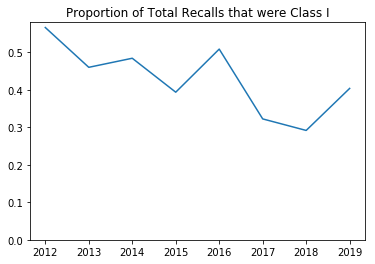

In [33]:
plt.plot(df_plot[df_plot['year']>=2012]['year'], 
         df_plot[df_plot['year']>=2012]['percentage'])
#plt.xlim(2012,2018)
plt.ylim(0)
plt.title("Proportion of Total Recalls that were Class I");

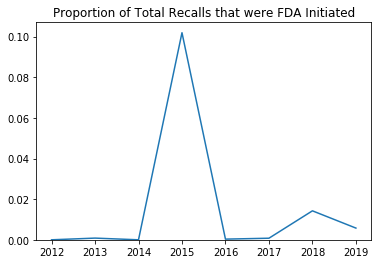

In [34]:
df_plot2 = df.groupby(['initiation_year']).sum()['FDA_initiated']
df_plot2_total=df['initiation_year'].value_counts()
df_plot2=pd.concat([df_plot2,df_plot2_total],axis=1)
df_plot2['percentage']= df_plot2['FDA_initiated']/df_plot2['initiation_year']
df_plot2['year']= df_plot2.index
plt.plot(df_plot2[df_plot2['year']>=2012]['year'], 
         df_plot2[df_plot2['year']>=2012]['percentage'])
#plt.xlim(2012,2018)
plt.ylim(0)
plt.title("Proportion of Total Recalls that were FDA Initiated")
plt.show;

      red_states  initiation_year  percentage  blue_state_per  year
2008           1                1    1.000000        0.000000  2008
2009          18               18    1.000000        0.000000  2009
2010           1                2    0.500000        0.500000  2010
2011           9               14    0.642857        0.357143  2011
2012         493             1209    0.407775        0.592225  2012
2013         692             1105    0.626244        0.373756  2013
2014         376             1181    0.318374        0.681626  2014
2015         710             1077    0.659239        0.340761  2015
2016         617             1550    0.398065        0.601935  2016
2017         382              827    0.461911        0.538089  2017
2018         326              552    0.590580        0.409420  2018
2019          89              140    0.635714        0.364286  2019


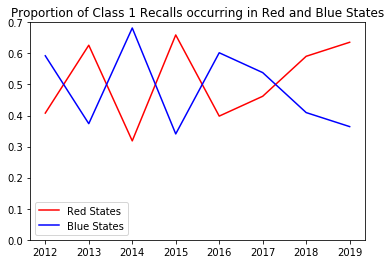

In [35]:
df_plot3 = df[df.Class_1==1].groupby(['initiation_year']).sum()['red_states']
df_plot3_total=df[df.Class_1==1]['initiation_year'].value_counts()
df_plot3=pd.concat([df_plot3,df_plot3_total],axis=1)
df_plot3['percentage']= df_plot3['red_states']/df_plot3['initiation_year']
df_plot3['blue_state_per'] = 1-df_plot3['red_states']/df_plot3['initiation_year']
df_plot3['year']= df_plot3.index
print(df_plot3)
plt.plot(df_plot3[df_plot3['year']>=2012]['year'], 
          df_plot3[df_plot3['year']>=2012]['percentage'], label='Red States', color='red')
plt.plot(df_plot3[df_plot3['year']>=2012]['year'], 
          df_plot3[df_plot3['year']>=2012]['blue_state_per'], label='Blue States', color='blue')

 #plt.xlim(2012,2018)
plt.ylim(0)
plt.title("Proportion of Class 1 Recalls occurring in Red and Blue States")
plt.legend()
plt.show();

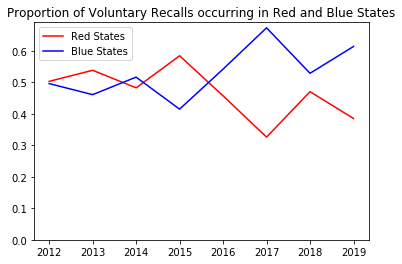

In [36]:
df_plot4 = df[df.FDA_initiated==0].groupby(['initiation_year']).sum()['red_states']
df_plot4_total=df[df.FDA_initiated==0]['initiation_year'].value_counts()
df_plot4=pd.concat([df_plot4,df_plot4_total],axis=1)
df_plot4
df_plot4['percentage']= df_plot4['red_states']/df_plot4['initiation_year']
df_plot4['blue_state_per'] = 1-df_plot4['red_states']/df_plot4['initiation_year']
df_plot4['year']= df_plot4.index
plt.plot(df_plot4[df_plot4['year']>=2012]['year'], 
          df_plot4[df_plot4['year']>=2012]['percentage'], label='Red States', color='red')
plt.plot(df_plot4[df_plot4['year']>=2012]['year'], 
          df_plot4[df_plot4['year']>=2012]['blue_state_per'], label='Blue States', color='blue')

 #plt.xlim(2012,2018)
plt.ylim(0)
plt.title("Proportion of Voluntary Recalls occurring in Red and Blue States")
plt.legend()
plt.show();

In [37]:
df[df['initiation_year']==2015][df['FDA_initiated']==1]['event_id'].value_counts()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


74054    163
72083    104
72877     10
70694      2
Name: event_id, dtype: int64

In [38]:
df[df['event_id']=='72083'].iloc[0]['reason_for_recall']

'Pursuant to a consent decree for injunctive relief the recalling firm was ordered to recall all products because they are misbranded, unapproved new drugs and adulterated dietary supplements.'

In [39]:
df[df['event_id']=='74054']

,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,postal_code,product_description,product_quantity,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated,red_states,Class_1,FDA_initiated,initiation_date,initiation_year
2473,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,"Tyrosine Formula, 90 capsules per bottle","250 Bottles, ( 22,500 capsules)",Food,Pursuant to a consent decree that prohibits th...,20151013,F-0957-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2474,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,"Argindione, (50,000 capsule bulk)","50,000 capsules",Food,Pursuant to a consent decree that prohibits th...,20151013,F-0935-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2475,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,"Performens, 30 capsules per bottle","2000 Bottles (120,000 Caps)",Food,Pursuant to a consent decree that prohibits th...,20151013,F-0910-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2476,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,"Collagen & VIT C, 60 capsules per bottle","23,100 Bottles (1,364,000 capsules)",Food,Pursuant to a consent decree that prohibits th...,20151013,F-0929-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2477,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,Esclewe Dietary Supplement (unknown container ...,Unknown,Food,Pursuant to a consent decree that prohibits th...,20151013,F-1045-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2478,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,Bioxtron Dietary Supplement (unknown container...,Unknown,Food,Pursuant to a consent decree that prohibits th...,20151013,F-1024-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2479,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,"Aloe Vera & Lecithin, bulk capsules","1,457,000",Food,Pursuant to a consent decree that prohibits th...,20151013,F-0995-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2543,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,"Joint I, 60 capsules per bottle","36 Bottles (12,400 capsules",Food,Pursuant to a consent decree that prohibits th...,20151013,F-0931-2017,Sunset Natural Products Inc.,20170104,FL,Terminated,20170410,FDA Mandated,1,0,1,2015-10-13,2015
2544,7345 SW 45th St,,20161228,Miami,Class II,"As persuant to the Consent Decree, the firm ag...",United States,"Products distributed to Florida, Nevada and th...",74054,Letter,33155-4509,First Defense Probiotic

In [40]:
pre_trump_vol['red_states'].value_counts(), post_trump_vol['red_states'].value_counts() 
pre_trump_vol[pre_trump_vol['red_states']==1]['red_states'].value_counts()

1    2721
Name: red_states, dtype: int64

In [41]:
def ztestresults(data1,data2, g_var,hyp_type):
    c1 = data1[data1[g_var]==1][g_var].sum()
    c2 = data2[data2[g_var]==1][g_var].sum()
    count = [c1,c2]
    nobs = [len(data1), len(data2)]
    stat,pval = proportions_ztest(count,nobs,value=0,alternative=hyp_type)
    print('p-value: {0:0.3f}'.format(pval))
    print('z-statistic: {}'.format(round(stat,2)))

In [46]:
# Hypothesis 1
ztestresults(pre_trump_class_1,post_trump_class_1,'red_states','larger')

p-value: 0.655
z-statistic: -0.4


In [47]:
# Hypothesis 2
ztestresults(pre_trump,post_trump,'Class_1','larger')

p-value: 0.000
z-statistic: 15.6


In [48]:
# Hypothesis 3
ztestresults(pre_trump,post_trump,'FDA_initiated','larger')

p-value: 0.000
z-statistic: 12.57


In [49]:
# Hypothesis 4
ztestresults(pre_trump_vol,post_trump_vol,'red_states','larger')

p-value: 0.000
z-statistic: 12.27
